# CNN Filter and Activation Map Visualization 

This notebook outlines various methods for looking at filters and activation maps in CNN models. I think visually, so this is really meant to help me understand what is going on under the hood. I hope you find it useful as well. 

#### **Methods:**
* [Loading the Model](#load_the_model)
* [Filter Visualization](#filter_visualization)
* [Activation Map Visualization](#activation_map_vis)

In [1]:
import torch
import torch.nn as nn
from torchvision import models, transforms
import cv2
import numpy as np
from PIL import Image
from PIL import ImageFile
import matplotlib.pyplot as plt

ImageFile.LOAD_TRUNCATED_IMAGES = True
%matplotlib inline  
%config InlineBackend.figure_format = 'retina'

<a id='load_the_model'></a>
## Load the Model
Here we will load a pretrained model from Pytorch. We will be using the VGG16 model in evaluation mode. Let's print the model to take a look at the various layers. The model has three children:
* features
* avgpool
* classifier

It is the features that we are interested in extracting weights from. Essentially, these weights in the Conv2d layers make up the filters that will pass over each image during a forward pass through the network. Let's take a look at the model and each filter. 

In [2]:
model = models.vgg16(pretrained=True)
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [3]:
model_weights, conv_layers = [], []
features = model.features
conv_counter = 0

for i in range(len(features)):
    if type(features[i]) == nn.Conv2d:
        conv_counter += 1
        model_weights.append(features[i].weight)
        conv_layers.append(features[i])

### Convolution Layers

I'll print out each convolutional layer to take a look at the depth and tensor size.  

In [4]:
for i, (weights, layers) in enumerate(zip(model_weights, conv_layers)):
    print('Conv layer {}: {} --> Shape: {}'.format(i+1, layers, weights.shape))
          

Conv layer 1: Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) --> Shape: torch.Size([64, 3, 3, 3])
Conv layer 2: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) --> Shape: torch.Size([64, 64, 3, 3])
Conv layer 3: Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) --> Shape: torch.Size([128, 64, 3, 3])
Conv layer 4: Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) --> Shape: torch.Size([128, 128, 3, 3])
Conv layer 5: Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) --> Shape: torch.Size([256, 128, 3, 3])
Conv layer 6: Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) --> Shape: torch.Size([256, 256, 3, 3])
Conv layer 7: Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) --> Shape: torch.Size([256, 256, 3, 3])
Conv layer 8: Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) --> Shape: torch.Size([512, 256, 3, 3])
Conv layer 9: Conv2d(512, 512, kerne

<a id='filter_visualization'></a>
## Filter Visualization

Looking at the first filter in Conv layer 1 (`model_weights[idx of conv layer][idx of the filter]`) we can see that it has a `kernel_size = (3, 3)`.

In [26]:
plt.figure(figsize=[10, 10])
model_weights[0][0]

tensor([[[-0.5537,  0.1427,  0.5290],
         [-0.5831,  0.3566,  0.7657],
         [-0.6902, -0.0480,  0.4841]],

        [[ 0.1755,  0.0099, -0.0814],
         [ 0.0441, -0.0703, -0.2604],
         [ 0.1324, -0.1728, -0.1323]],

        [[ 0.3130, -0.1659, -0.4275],
         [ 0.4752, -0.0827, -0.4870],
         [ 0.6320,  0.0193, -0.2775]]], grad_fn=<SelectBackward>)

<Figure size 720x720 with 0 Axes>

### Individual filter visualization
Here I'm taking a look what one kernel on all three color channels would look like. We need to `torch.detach()` the Tensor and convert it to a numpy array. I'm converting the color channel values to integers and RGB values. 

torch.Size([3, 3, 3])
[[[115  36 134]
  [108  90 195]
  [ 80 244 123]]

 [[ 44   2 236]
  [ 11 239 190]
  [ 33 212 223]]

 [[ 79 214 147]
  [121 235 132]
  [161   4 186]]]


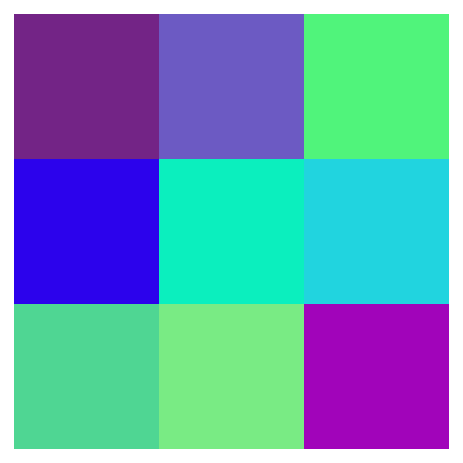

In [84]:
print(model_weights[0][0].shape)
test = model_weights[0][0].detach().numpy()
print(np.uint8(test[:,:,:]*255))
plt.imshow(np.uint8(test[:,:,:]*255))
plt.axis('off')
plt.show()

Using the `plot_filter` function to print various filters from 3 convolutional layers. Instead of combining all color channel kernels I'm just looking at the first one and converting it to grayscale. This will help visualize the activation maps. 

* Layer 1 - Depth of 64
* Layer 5 - Depth of 256
* Layer 10 - Depth of 512

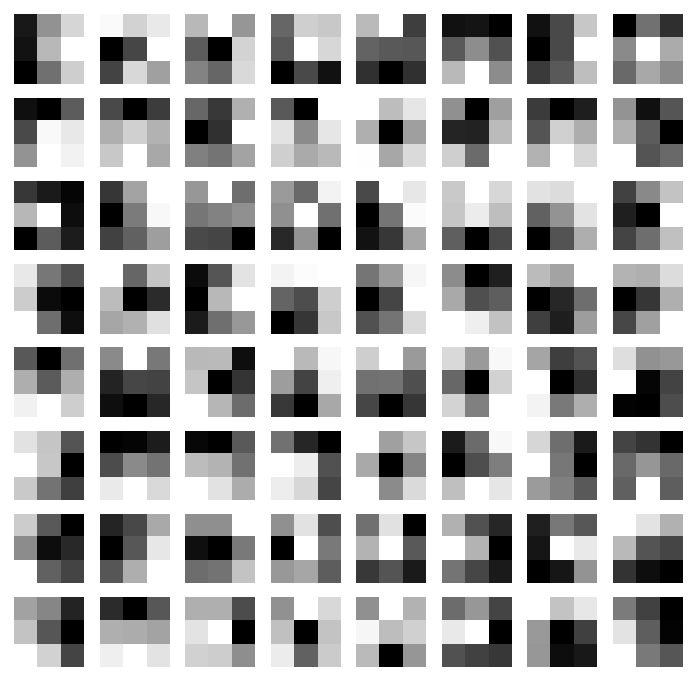

In [103]:
def plot_filter(layer=1, size=6, row=8, col=8):
    """ Print function that prints the filters of a selected 
        convolutional layer. 
        
        Arguments:
            - layer (int) conv layer
            - size (int) x, y dim of plot
            - row, col (int) row and column width of plot
        Returns:
            - saved image (.jpg)
            - plt.show()
    """
    plt.figure(figsize=[size, size])
    for i, filt in enumerate(model_weights[layer-1]):
        plt.subplot(row, col, i+1)
        
        # Displaying filters through all color channels
#         filtr = filt[:,:,:].detach().numpy()
#         plt.imshow(np.uint8(filtr*255)) 
        
        # Looking at the fist color channel converted to grayscale
        filtr = filt[0,:,:].detach().numpy()
        plt.imshow(filtr, cmap='gray')
        plt.axis('off')
    fname = 'conv_layer_{}_filter.jpg'.format(layer)
#     plt.savefig(fname, dpi=150)
    plt.show()
    
plot_filter(1, 6, 8, 8)

<a id='activation_map_vis'></a>
## Activation Map Visualization

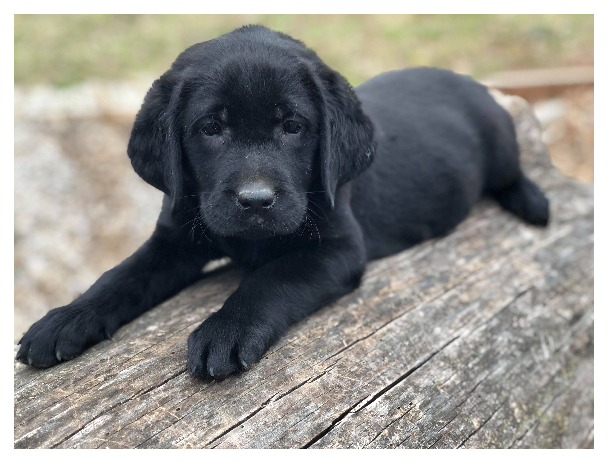

(3024, 4032, 3)


In [96]:
img = cv2.imread('images/Labrador_retriever_01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()
print(img.shape)

In [97]:
transform = transforms.Compose([transforms.ToPILImage(),
                                transforms.Resize((224, 224)),
                                transforms.ToTensor()])

im = np.array(img)
im = transform(im)
print(im.size())
im = im.unsqueeze(0)
print(im.size())

torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])


In [99]:
conv_out = [conv_layers[0](im)]
print(len(conv_out))
for i in range(1, len(conv_layers)):
    conv_out.append(conv_layers[i](conv_out[-1]))
    
results = conv_out

1


torch.Size([64, 224, 224])


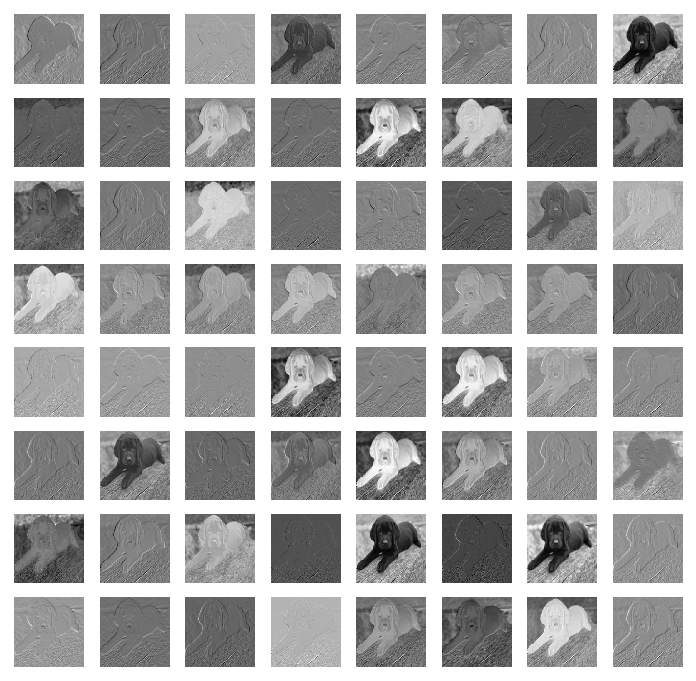

In [102]:
layer = 1

plt.figure(figsize=[6, 6])
conv_layer_vis = results[layer-1][0,:,:,:]
conv_layer_vis = conv_layer_vis.data
print(conv_layer_vis.size())
for i, filt_num in enumerate(conv_layer_vis):
    plt.subplot(8, 8, i+1)
    plt.imshow(filt_num, cmap='gray')
    plt.axis('off')
    
fname = 'conv_layer_{}_output.jpg'.format(layer)   
plt.savefig(fname, dpi=150)
plt.show()

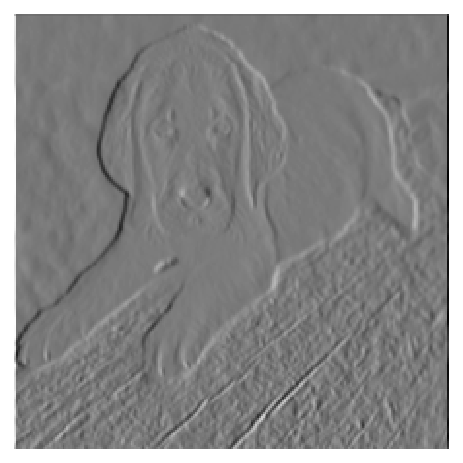

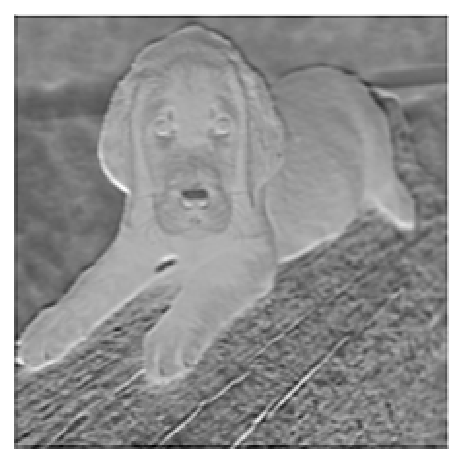

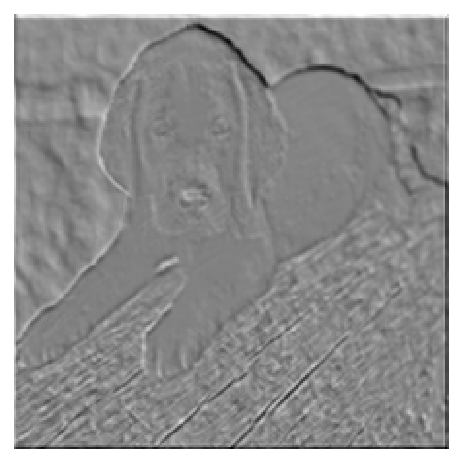

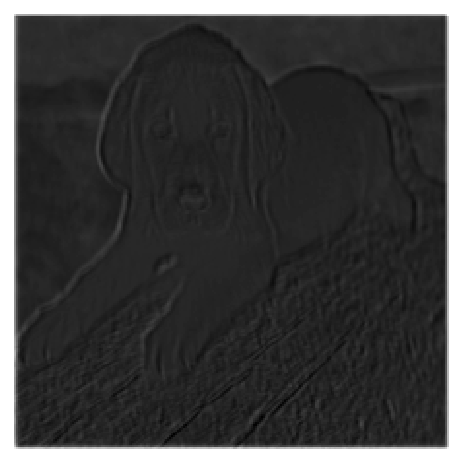

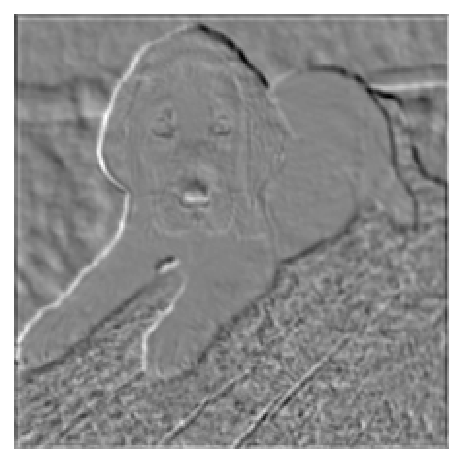

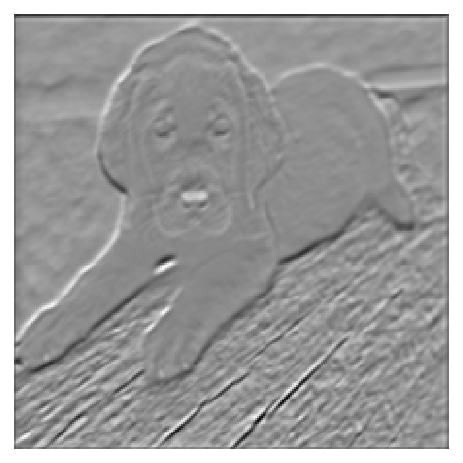

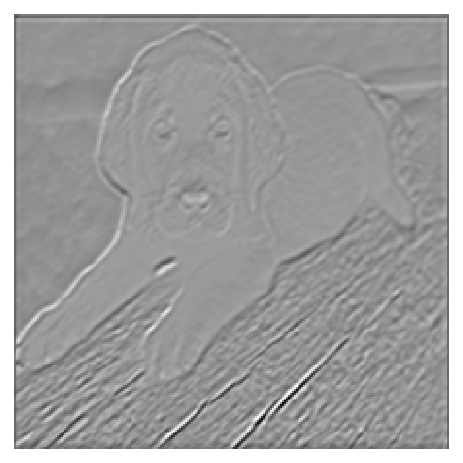

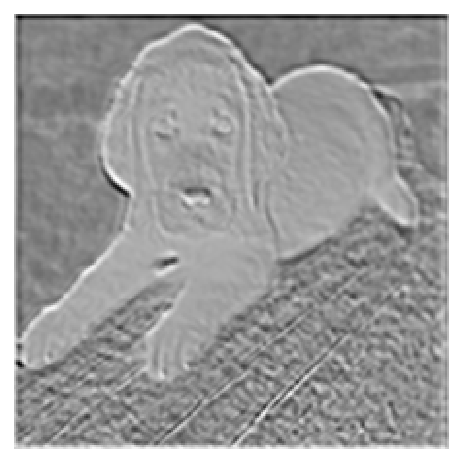

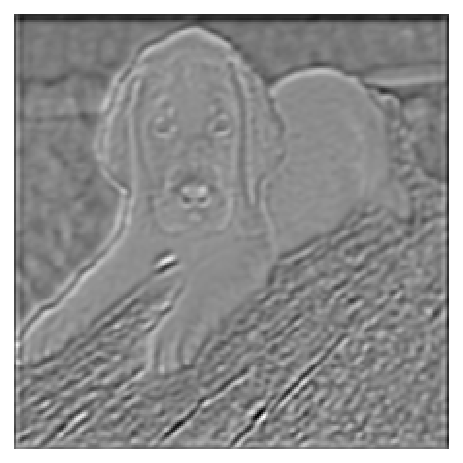

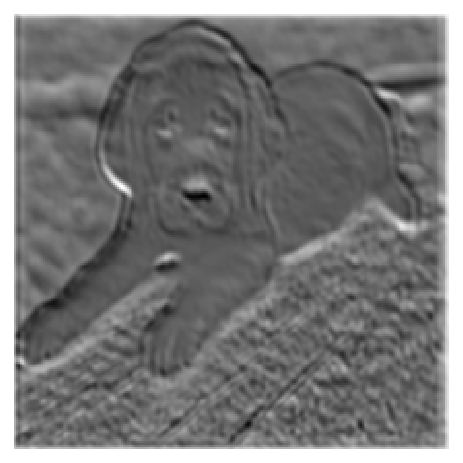

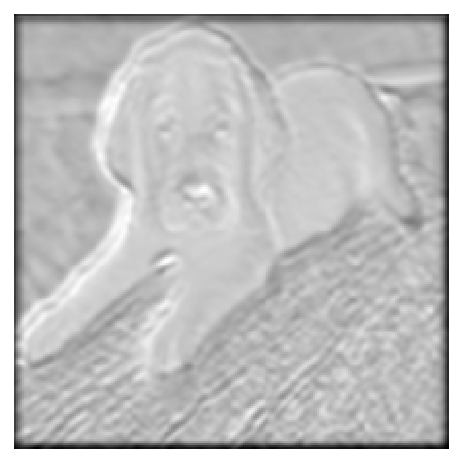

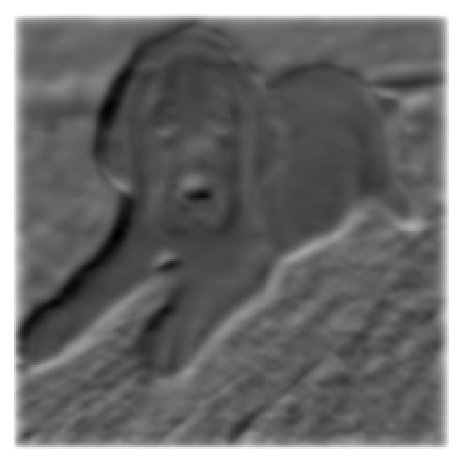

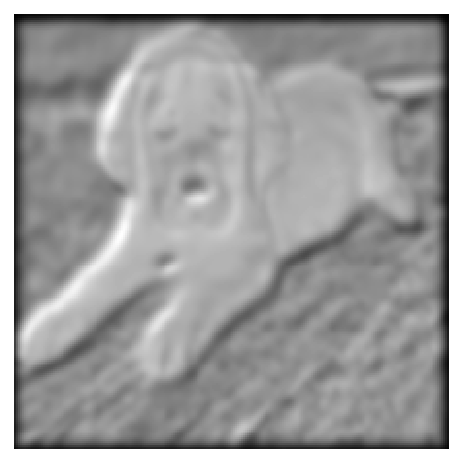

In [448]:
layer_num = 1
filter_num = 17
for i in range(len(results)):
    temp_layer = results[i][0,:,:,:].data
#     print(temp_layer.shape[0])
    plt.imshow(temp_layer[filter_num], cmap='gray')
    plt.axis('off')
    fname = 'images/lab_layer_{}.jpg'.format(i+1)
    plt.savefig(fname, dpi=150)
    plt.show()